In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sonar.all-data", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
178,0.0197,0.0394,0.0384,0.0076,0.0251,0.0629,0.0747,0.0578,0.1357,0.1695,...,0.0134,0.0097,0.0042,0.0058,0.0072,0.0041,0.0045,0.0047,0.0054,M
139,0.0164,0.0627,0.0738,0.0608,0.0233,0.1048,0.1338,0.0644,0.1522,0.0780,...,0.0258,0.0143,0.0226,0.0187,0.0185,0.0110,0.0094,0.0078,0.0112,M
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
51,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,R
33,0.0442,0.0477,0.0049,0.0581,0.0278,0.0678,0.1664,0.1490,0.0974,0.1268,...,0.0204,0.0216,0.0135,0.0055,0.0073,0.0080,0.0105,0.0059,0.0105,R


In [5]:
df.shape

(208, 61)

In [7]:

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [11]:
df[60] = df[60].map({'M': 0, 'R': 1})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [13]:
X = df.drop(60, axis=1)
y = df[60]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [15]:
X_train.shape

(156, 60)

In [17]:
y_train.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [19]:
# Convert the split arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [21]:
# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

<h3>Train Neural Network without any Regularization <h3/>

In [24]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

In [26]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

Epoch 1/40, Train Loss: 0.6918, Val Loss: 0.6730, Val Accuracy: 0.5385
Epoch 2/40, Train Loss: 0.6780, Val Loss: 0.6587, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6633, Val Loss: 0.6487, Val Accuracy: 0.6538
Epoch 4/40, Train Loss: 0.6437, Val Loss: 0.6321, Val Accuracy: 0.7885
Epoch 5/40, Train Loss: 0.6170, Val Loss: 0.6001, Val Accuracy: 0.6923
Epoch 6/40, Train Loss: 0.5939, Val Loss: 0.5782, Val Accuracy: 0.7885
Epoch 7/40, Train Loss: 0.5732, Val Loss: 0.5531, Val Accuracy: 0.7692
Epoch 8/40, Train Loss: 0.5150, Val Loss: 0.5447, Val Accuracy: 0.7308
Epoch 9/40, Train Loss: 0.4941, Val Loss: 0.5263, Val Accuracy: 0.7308
Epoch 10/40, Train Loss: 0.4686, Val Loss: 0.5117, Val Accuracy: 0.7308
Epoch 11/40, Train Loss: 0.4414, Val Loss: 0.5150, Val Accuracy: 0.7308
Epoch 12/40, Train Loss: 0.4088, Val Loss: 0.4950, Val Accuracy: 0.7115
Epoch 13/40, Train Loss: 0.3872, Val Loss: 0.4786, Val Accuracy: 0.6923
Epoch 14/40, Train Loss: 0.3750, Val Loss: 0.4813, Val Accuracy: 0.7115
E

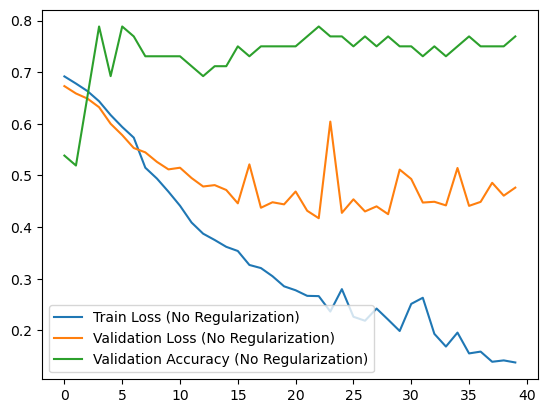

In [28]:
# Initialize and train the model without dropout
model_without_reg = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_reg.parameters(), lr=0.001)

train_losses_no_reg, val_losses_no_reg, val_accuracies_no_reg = train_model(
    model_without_reg, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_losses_no_reg, label="Train Loss (No Regularization)")
plt.plot(val_losses_no_reg, label="Validation Loss (No Regularization)")
plt.plot(val_accuracies_no_reg, label="Validation Accuracy (No Regularization)")
plt.legend()
plt.show()

<h3> Train Neural Network with L2 Regularization <h3/>

Epoch 1/40, Train Loss: 0.6935, Val Loss: 0.6748, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6909, Val Loss: 0.6738, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6856, Val Loss: 0.6695, Val Accuracy: 0.5192
Epoch 4/40, Train Loss: 0.6840, Val Loss: 0.6680, Val Accuracy: 0.5192
Epoch 5/40, Train Loss: 0.6842, Val Loss: 0.6649, Val Accuracy: 0.5192
Epoch 6/40, Train Loss: 0.6848, Val Loss: 0.6649, Val Accuracy: 0.5192
Epoch 7/40, Train Loss: 0.6810, Val Loss: 0.6699, Val Accuracy: 0.5192
Epoch 8/40, Train Loss: 0.6823, Val Loss: 0.6683, Val Accuracy: 0.5192
Epoch 9/40, Train Loss: 0.6813, Val Loss: 0.6652, Val Accuracy: 0.5192
Epoch 10/40, Train Loss: 0.6791, Val Loss: 0.6688, Val Accuracy: 0.5192
Epoch 11/40, Train Loss: 0.6800, Val Loss: 0.6613, Val Accuracy: 0.5192
Epoch 12/40, Train Loss: 0.6751, Val Loss: 0.6636, Val Accuracy: 0.5192
Epoch 13/40, Train Loss: 0.6751, Val Loss: 0.6585, Val Accuracy: 0.5192
Epoch 14/40, Train Loss: 0.6708, Val Loss: 0.6576, Val Accuracy: 0.5192
E

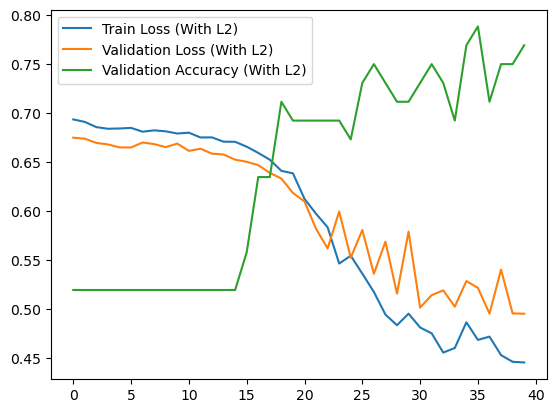

In [31]:
# Initialize and train the model with L2 regularization
model_with_l2 = NeuralNet()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.001, weight_decay=0.04) # weight decay parameter is used for L2 regularization

train_losses_with_l2, val_losses_with_l2, val_accuracies_with_l2 = train_model(
    model_with_l2, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_l2, label="Train Loss (With L2)")
plt.plot(val_losses_with_l2, label="Validation Loss (With L2)")
plt.plot(val_accuracies_with_l2, label="Validation Accuracy (With L2)")
plt.legend()
plt.show()